In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Latex
from sympy import * 
from iminuit import Minuit
import seaborn as sns
import pandas as pd
import scipy as sp
import sys                                             # Modules to see files and folders in directories
sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure
from scipy.stats import binom, poisson, norm
from simple_pendulum_functions import Residual_time
from Universal_functions import weighted_mean,uncertainty_weighted

In [2]:
Tan=np.loadtxt("../data/pendulum/timer_output1_tan.dat")
Michael1=np.loadtxt("../data/pendulum/trash_data_Michael.dat")
Michael2=np.loadtxt("../data/pendulum/better_data_Michael.dat")
Chris=np.loadtxt("../data/pendulum/chris_data_0.dat")
Luca=np.loadtxt("../data/pendulum/timer_output_luca.dat")

In [3]:
Time_lib={"Tan":Tan[1:,1],"Michael1":Michael1[:,1]-min(Michael1[:,1]),"Michael2":Michael2[1:51,1],"Chris":Chris[:,1],"Luca":Luca[:,1]}
Number_lib={"Tan":Tan[1:,0],"Michael1":Michael1[:,0],"Michael2":Michael2[1:51,0],"Chris":Chris[:,0],"Luca":Luca[:,0]}
Time=pd.DataFrame(Time_lib)
Number=pd.DataFrame(Number_lib)

In [4]:
Residual_time1={"Tan":Residual_time(Time.Tan,Number.Tan),"Michael1":Residual_time(Time.Michael1,Number.Michael1),"Michael2":Residual_time(Time.Michael2,Number.Michael2),"Chris":Residual_time(Time.Chris,Number.Chris),"Luca":Residual_time(Time.Luca,Number.Luca)}
Residual_Time_data=pd.DataFrame(Residual_time1)

In [5]:
print(Residual_Time_data.Tan.mean(),Residual_Time_data.Tan.std())
print(Residual_Time_data.Luca.mean(),Residual_Time_data.Luca.std())
print(Residual_Time_data.Michael2.mean(),Residual_Time_data.Michael2.std())
print(Residual_Time_data.Chris.mean(),Residual_Time_data.Chris.std())

-1.021405182655144e-16 0.022663001369067584
4.39648317751562e-16 0.0173718725309037
4.662936703425658e-16 0.30312358653128085
-4.440892098500626e-18 0.03039779685299959


In [6]:

y_Tan=sp.stats.norm(Residual_Time_data.Tan.mean(), Residual_Time_data.Tan.std())
y_Luca=sp.stats.norm(Residual_Time_data.Luca.mean(), Residual_Time_data.Luca.std())
y_Michael=sp.stats.norm(Residual_Time_data.Michael2.mean(), Residual_Time_data.Michael2.std())
y_Chris=sp.stats.norm(Residual_Time_data.Chris.mean(), Residual_Time_data.Chris.std())

In [8]:
x=np.linspace(-max(abs(Residual_Time_data.Tan)),max(abs(Residual_Time_data.Tan)),100)
x_2=np.linspace(-max(abs(Residual_Time_data.Michael2)),max(abs(Residual_Time_data.Michael2)),100)

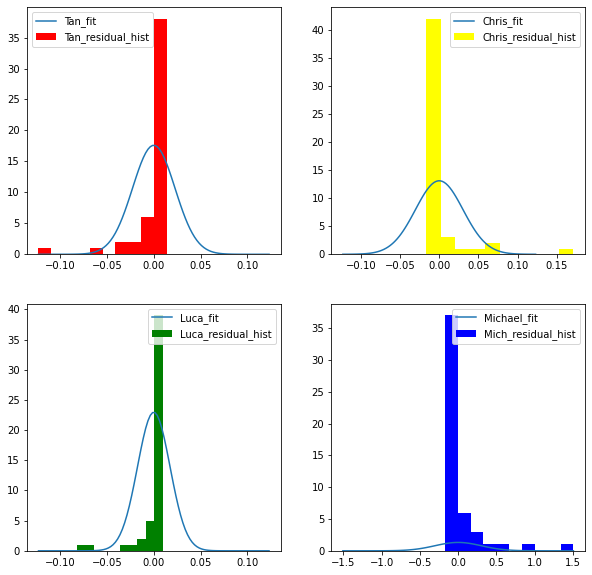

In [9]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(x,y_Tan.pdf(x),label="Tan_fit")
ax[0,0].hist(Residual_Time_data.Tan,color='red',label="Tan_residual_hist",bins=10)
ax[1,0].plot(x,y_Luca.pdf(x),label="Luca_fit")
ax[1,0].hist(Residual_Time_data.Luca,color='green',label="Luca_residual_hist",bins=10)
ax[1,1].plot(x_2,y_Michael.pdf(x_2),label="Michael_fit")
ax[1,1].hist(Residual_Time_data.Michael2,color='blue',label="Mich_residual_hist",bins=10)
ax[0,1].plot(x,y_Chris.pdf(x),label="Chris_fit")
ax[0,1].hist(Residual_Time_data.Chris,color='yellow',label="Chris_residual_hist",bins=10)
ax[0,0].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[0,1].legend()